# Validación

In [6]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
img_bgr = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

print(f"Imagen {file_name} importada con éxito. Tamaño: {img_rgb.shape}")

Saving WhatsApp Image 2026-02-13 at 8.19.34 PM.jpeg to WhatsApp Image 2026-02-13 at 8.19.34 PM.jpeg
Imagen WhatsApp Image 2026-02-13 at 8.19.34 PM.jpeg importada con éxito. Tamaño: (1599, 899, 3)


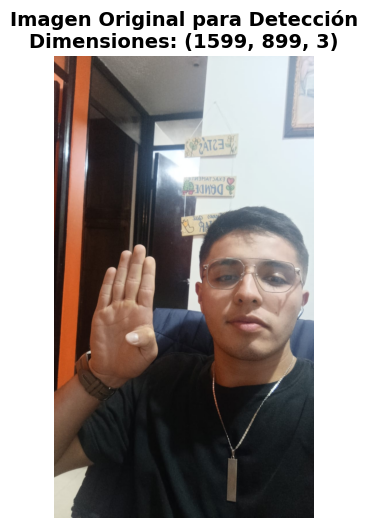

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title(f"Imagen Original para Detección\nDimensiones: {img_rgb.shape}", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

In [3]:
!pip install -q mediapipe==0.10.32
!wget -q -O hand_landmarker.task https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 11.5 MB/s eta 0:00:00


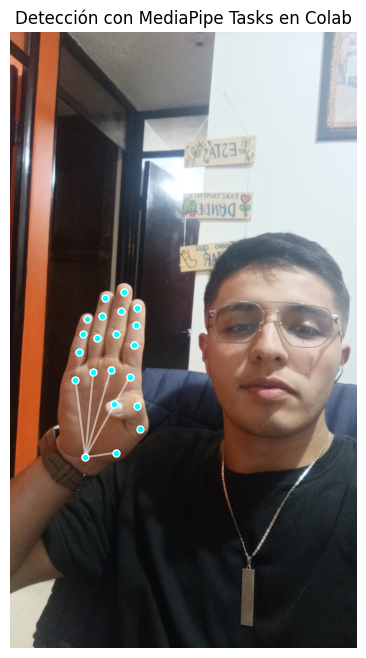

¡Éxito! Se detectaron 1 mano(s).


In [8]:
import mediapipe as mp

# Configuración simplificada de rutas
BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Crear el detector
options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path='hand_landmarker.task'),
    running_mode=VisionRunningMode.IMAGE,
    num_hands=2)

with HandLandmarker.create_from_options(options) as detector:
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=img_rgb)

    # Detectar
    detection_result = detector.detect(mp_image)

plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)

if detection_result.hand_landmarks:
    h, w, _ = img_rgb.shape
    for hand_landmarks in detection_result.hand_landmarks:
        x_coords = [lm.x * w for lm in hand_landmarks]
        y_coords = [lm.y * h for lm in hand_landmarks]
        plt.scatter(x_coords, y_coords, s=25, c='cyan', edgecolors='white', zorder=3)
        for i in [0]:
            for j in [1, 5, 9, 13, 17]:
                plt.plot([x_coords[i], x_coords[j]], [y_coords[i], y_coords[j]], 'white', alpha=0.5)

plt.axis('off')
plt.title("Detección con MediaPipe Tasks en Colab")
plt.show()

if detection_result.hand_landmarks:
    print(f"¡Éxito! Se detectaron {len(detection_result.hand_landmarks)} mano(s).")
else:
    print("No se detectaron manos. Verifica que la iluminación sea buena.")

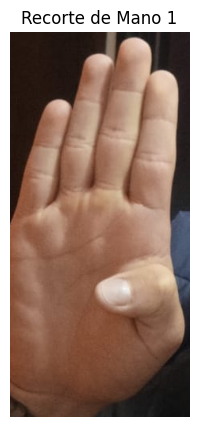

In [9]:
if detection_result.hand_landmarks:
    h, w, _ = img_rgb.shape
    for i, hand_landmarks in enumerate(detection_result.hand_landmarks):
        x_coords = [int(lm.x * w) for lm in hand_landmarks]
        y_coords = [int(lm.y * h) for lm in hand_landmarks]
        x_min, x_max = min(x_coords), max(x_coords)
        y_min, y_max = min(y_coords), max(y_coords)
        margin = 30
        x_min = max(0, x_min - margin)
        y_min = max(0, y_min - margin)
        x_max = min(w, x_max + margin)
        y_max = min(h, y_max + margin)
        hand_crop = img_rgb[y_min:y_max, x_min:x_max]
        plt.figure(figsize=(5, 5))
        plt.imshow(hand_crop)
        plt.title(f"Recorte de Mano {i+1}")
        plt.axis('off')
        plt.show()
else:
    print("No se encontró ninguna mano para recortar.")